# 0. 데이터 설명

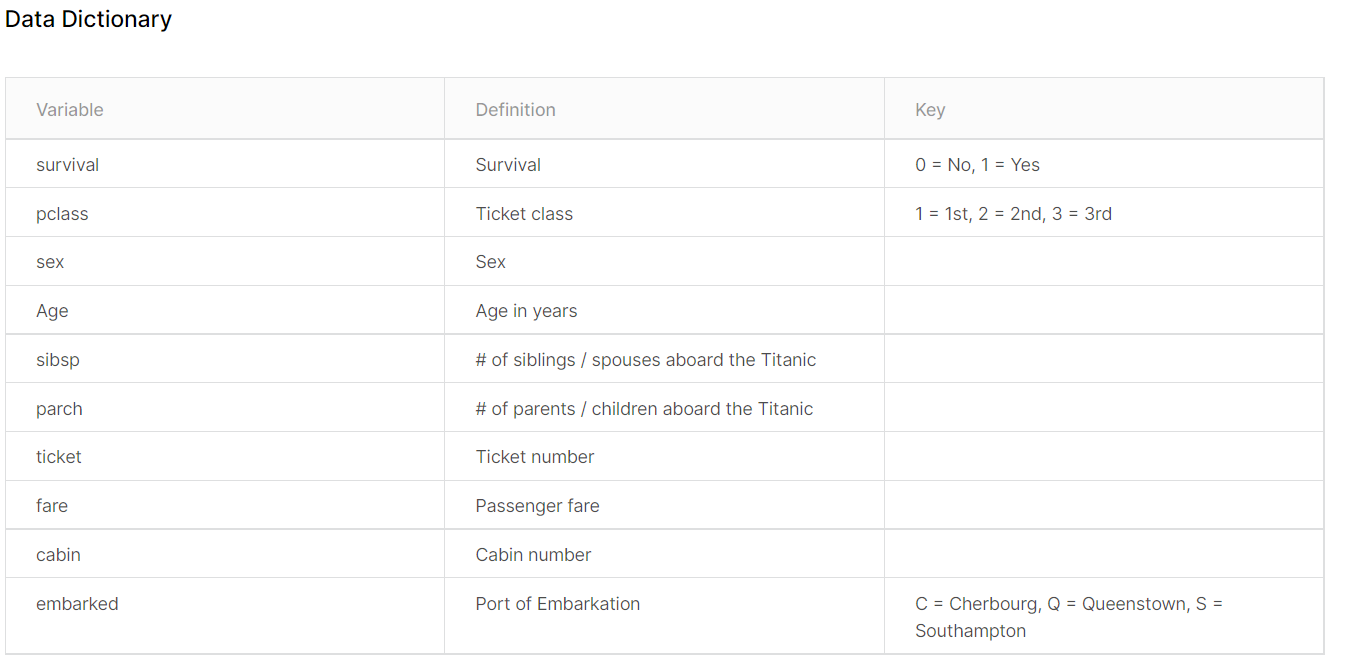

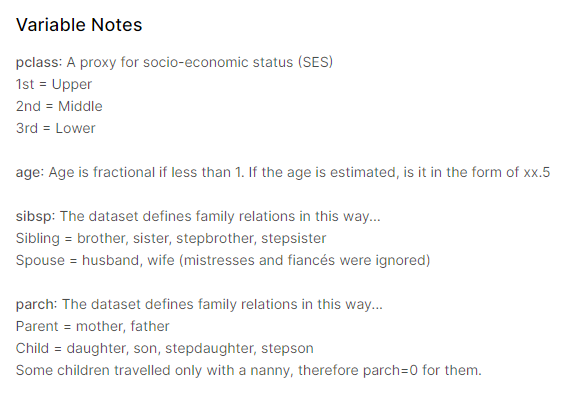

#### 변수 설명
* pclass : 1, 2, 3등석 
* survived : 생존 여부. survived(생존-1), dead(사망-0)
* name : 이름
* sex : 성별 : female(여성), male(남성)
* age : 나이
* sibsp : 함께 탑승한 형제 또는 배우자의 수
* parch : 함께 탑승한 부모 또는 자녀의 수
* ticket : 티켓 번호
* fare : 티켓 요금
* cabin : 선실 번호
* embarked :탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)
* boat : 탈출한 보트가 있다면 boat 번호

# 1.데이터 로드

In [158]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

# 경고무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [159]:
import pandas as pd
data_train_raw = pd.read_csv('data/train.csv')
data_test_raw  = pd.read_csv('data/test.csv')
data_train_raw.shape # 891 x 12
data_test_raw.shape # 418 x 11
data_train.head(3)
# test데이터에 비해 train 데이터 적네? 약68%가 train -> k-fold하거나 학습 늘려야함.

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2. 데이터 검증

In [160]:
import copy 
data_train = data_train_raw.copy()
data_test = data_test_raw.copy()

In [161]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
import numpy as np
np.sum(data_train.isnull()) 
# Age, Cabin 그리고 Embarked가 nan값이 있음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 산점도를 이용하면 두 변수간의 직선적인 관계를 대략적으로 파악은 가능하지만, 두 변수 사이의 관계를 어떠한 수치로 표현하지는 않다. 
- 그렇기에 우리는 두 변수 간의 관계를 수치로 표현하기 위해 공분산 및 상관계수를 이용하자

pclass : 1, 2, 3등석
survived : 생존 여부. survived(생존-1), dead(사망-0)
name : 이름
sex : 성별 : female(여성), male(남성)
age : 나이
sibsp : 함께 탑승한 형제 또는 배우자의 수
parch : 함께 탑승한 부모 또는 자녀의 수
ticket : 티켓 번호
fare : 티켓 요금
cabin : 선실 번호
embarked :탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)
boat : 탈출한 보트가 있다면 boat 번호

## 2-1. id feature 제거

In [164]:
# 제거할 변수 선정 passengerid
data_train = data_train.drop(['PassengerId','Name'], axis=1)
data_test = data_test.drop(['PassengerId','Name'], axis=1)
data_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 2-2. 데이터에서  target 분리

In [165]:
# train, target나누기
X_train = pd.DataFrame(data_train.iloc[:,1:])
y_train = pd.DataFrame(data_train.iloc[:,0])
feature_names = X_train.columns
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 2-3. PCA

## 2-3-1. 종속변수가 몰려있으면 PCA의미 없음

<AxesSubplot:xlabel='Survived'>

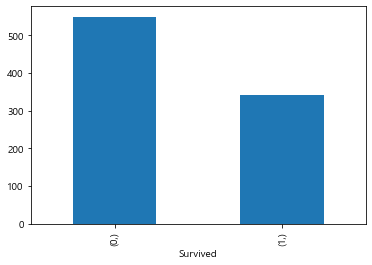

In [166]:
y_train.value_counts().plot(kind='bar') # 0-사망, 1-생존  엄청몰려있지는 않음

## 2-3-2. 문자들은 고유값 확인해서 가능하면 벡터로 

In [167]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### 이름 -> 삭제

In [168]:
print(np.sum(X_train['Ticket'].notnull())) # 891
print(len(pd.unique(X_train['Ticket']))) # 681 
# np.sum(data_train_raw['Ticket'].isnull())

891
681


## 티켓번호 -> 삭제

In [138]:
list(X_train.groupby(['Ticket'])) 

[('110152',
       Pclass     Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked
  257       1  female  30.0      0      0  110152  86.5   B77        S
  504       1  female  16.0      0      0  110152  86.5   B79        S
  759       1  female  33.0      0      0  110152  86.5   B77        S),
 ('110413',
       Pclass     Sex   Age  SibSp  Parch  Ticket   Fare Cabin Embarked
  262       1    male  52.0      1      1  110413  79.65   E67        S
  558       1  female  39.0      1      1  110413  79.65   E67        S
  585       1  female  18.0      0      2  110413  79.65   E68        S),
 ('110465',      Pclass   Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked
  110       1  male  47.0      0      0  110465  52.0  C110        S
  475       1  male   NaN      0      0  110465  52.0   A14        S),
 ('110564',      Pclass   Sex   Age  SibSp  Parch  Ticket   Fare Cabin Embarked
  430       1  male  28.0      0      0  110564  26.55   C52        S),
 ('110813',
       Pclass    

In [169]:
X_train[X_train['Ticket']=='110152'] # 가족, 배우자 들끼리 온사람 -> Ticket변수 뺴도됨

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,1,female,30.0,0,0,110152,86.5,B77,S
504,1,female,16.0,0,0,110152,86.5,B79,S
759,1,female,33.0,0,0,110152,86.5,B77,S


In [170]:
print(np.sum(data_train_raw['Name'].notnull()))  # 891
print(len(pd.unique(data_train_raw['Name']))) # 891
# 이름은 겹치는 사람 없음

891
891


In [171]:
X_train = X_train.drop(['Ticket'], axis=1)
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S


## sex nan: 177개 -> 남자0, 여자1, nan

In [172]:
pd.unique(data_train_raw['Sex']) # 0, 1로 변환

array(['male', 'female'], dtype=object)

In [173]:
tmp = []
for sex in X_train['Sex']:
    if sex == 'male':
        tmp.append(0)
    elif sex== 'female':
        tmp.append(1)
    else:
        tmp.append(np.nan)

X_train['Sex'] = tmp
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,38.0,1,0,71.2833,C85,C
2,3,1,26.0,0,0,7.9250,NaN,S


## Cabin(선실번호) nan:687개

In [182]:
pd.unique(data_train_raw['Cabin']) # 좀많은데
# 여럿이서오면 티켓번호도 동일한게 있고, 선실번호도 여러개네

array([False,  True])

In [ ]:
# 

## Embarked(탑승한곳) nan:2개

In [179]:
pd.unique(data_train_raw['Embarked']) # ['S', 'C', 'Q', nan]

array(['S', 'C', 'Q', nan], dtype=object)

## 2-3-3. 독립변수가 min, max양 끝으로 이분되어 있으면 의미 없음

In [144]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S


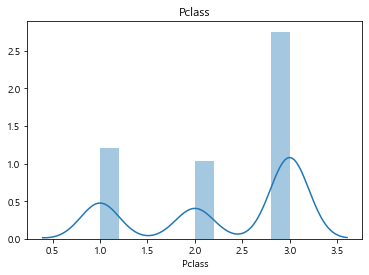

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

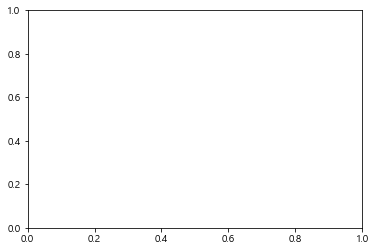

In [67]:
import seaborn as sns

for i in range(X_train.shape[1]): # 속성4개
    sns.distplot(X_train.iloc[:,i])
    plt.title(feature_names[i])
    plt.show()

# 제출파일 저장

In [ ]:
submission.to_csv('gender_submission.csv')

# 제출파일 확인

In [ ]:
submission = pd.read_csv('gender_submission.csv')
submission.head()